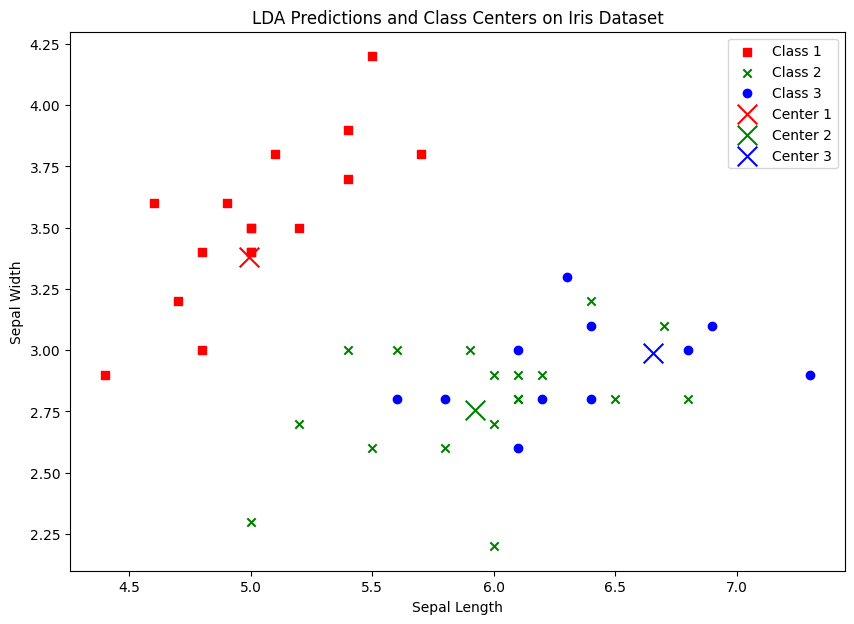

Score is  0.8


In [12]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Загрузка датасета iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # sepal_length и sepal_width
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Создание и обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказания для тестовой выборки
y_pred = lda.predict(X_test)

# Визуализация предсказаний и центров классов
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue']
markers = ['s', 'x', 'o']

# Тестовые данные
for i, color, marker in zip(np.unique(y_test), colors, markers):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], color=color, marker=marker, label=f'Class {i+1}')

# Центры классов
centers = lda.means_
for i, (center, center_color) in enumerate(zip(centers, colors)):
    plt.scatter(center[0], center[1], color=center_color, marker='x', s=200, label=f'Center {i+1}')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('LDA Predictions and Class Centers on Iris Dataset')
plt.legend()
plt.show()

print("Score is ", lda.score(X_test, y_test))



/Users/mihailgurbanov/Library/Caches/pypoetry/virtualenvs/mipt-advanced-python-UkQ5wbis-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mihailgurbanov/Library/Caches/pypoetry/virtualenvs/mipt-advanced-python-UkQ5wbis-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mihailgurbanov/Library/Caches/pypoetry/virtualenvs/mipt-advanced-python-UkQ5wbis-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress

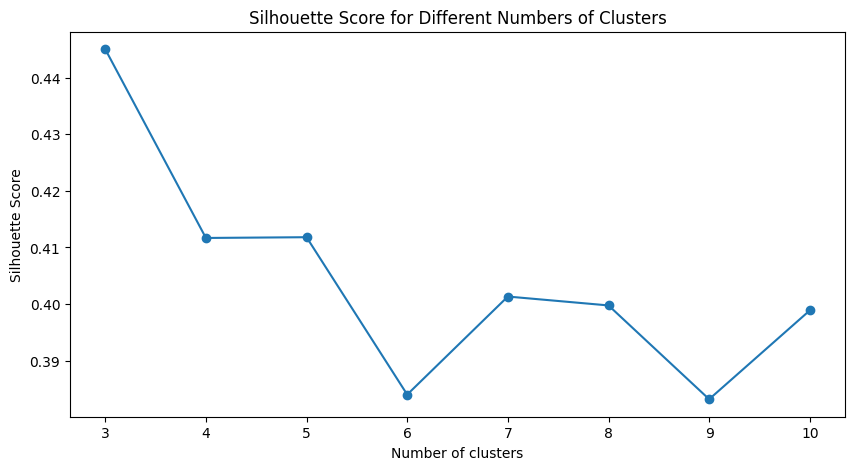

/Users/mihailgurbanov/Library/Caches/pypoetry/virtualenvs/mipt-advanced-python-UkQ5wbis-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


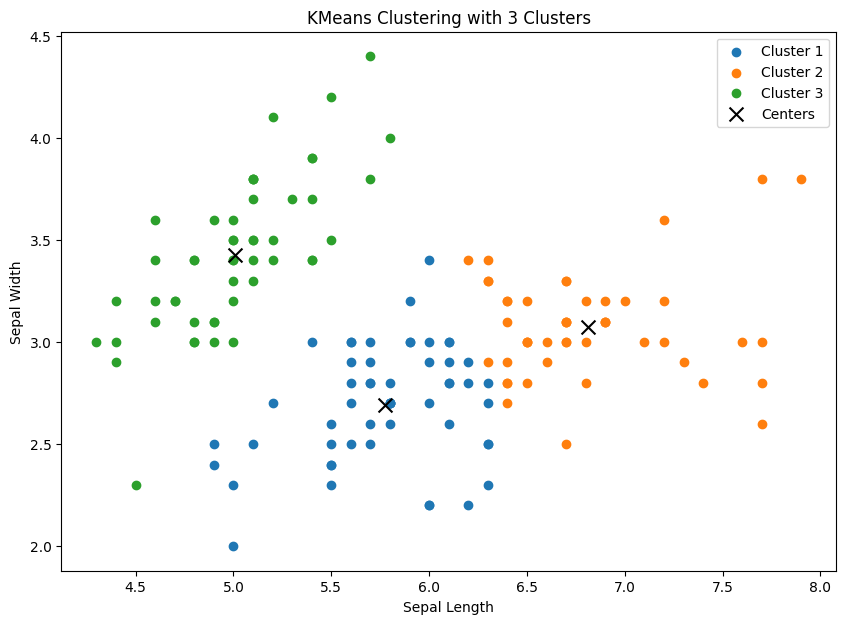

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Загрузка только признаков sepal_length и sepal_width
X = iris.data[:, :2]

# Поиск оптимального числа кластеров
silhouette_scores = []
for n_clusters in range(3, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Определение оптимального числа кластеров
optimal_clusters = np.argmax(silhouette_scores) + 3  # +3, потому что начинаем с 3 кластеров

# Визуализация silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# Обучение KMeans с оптимальным числом кластеров
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(X)

# Визуализация кластеров
plt.figure(figsize=(10, 7))
for i in range(optimal_clusters):
    plt.scatter(X[kmeans.labels_ == i, 0], X[kmeans.labels_ == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='x', label='Centers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(f'KMeans Clustering with {optimal_clusters} Clusters')
plt.legend()
plt.show()